# Задание

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel('geo.xlsx')
df

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1
...,...,...,...,...
108801,108801,37.454528,55.792331,-1
108802,108802,37.384325,55.899068,-1
108803,108803,37.421066,55.848756,1
108804,108804,37.448509,55.793065,-1


In [3]:
df = df.drop('Unnamed: 0', axis = 1)
df

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1
...,...,...,...
108801,37.454528,55.792331,-1
108802,37.384325,55.899068,-1
108803,37.421066,55.848756,1
108804,37.448509,55.793065,-1


In [4]:
district = df[['x', 'y']]
district

,x,y
0,37.612416,55.777454
1,37.612416,55.777454
2,37.603298,55.742108
3,37.558526,55.728758
4,37.566431,55.731794
...,...,...
108801,37.454528,55.792331
108802,37.384325,55.899068
108803,37.421066,55.848756
108804,37.448509,55.793065


### Районы города

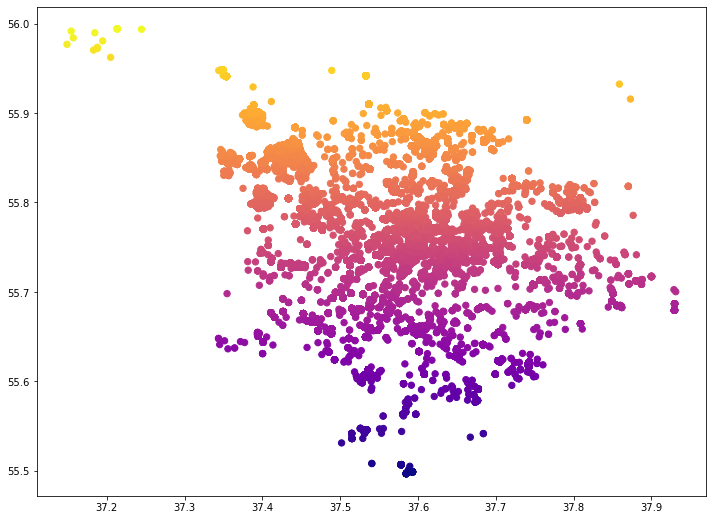

In [5]:
#Без стандартизации
plt.figure(figsize=(12,9))
plt.scatter(district['x'], district['y'],c= district['y'], s=40, cmap = 'plasma')

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(district)

In [7]:
from sklearn.cluster import KMeans

In [8]:
k_inertia = []
ks = range(1,15)

for k in ks:
  k_means = KMeans(n_clusters=k)
  clusters_kmeans = k_means.fit_predict(X_scaled)
  k_inertia.append(k_means.inertia_)

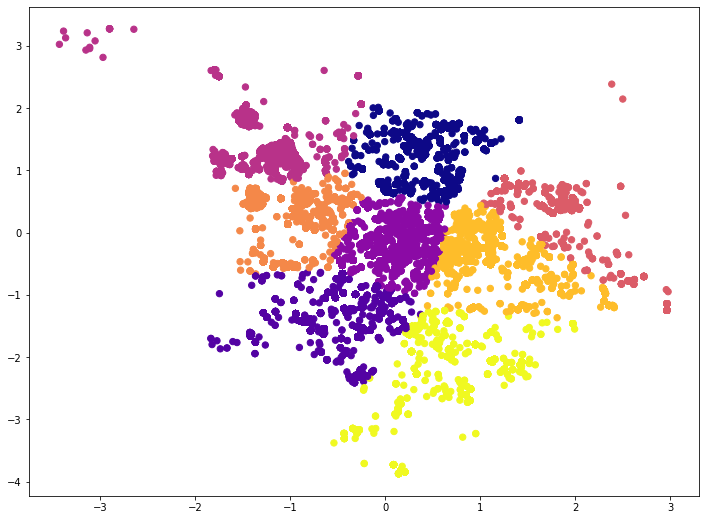

In [9]:
kmeans = KMeans()
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(12,9))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = clusters, s=40,cmap = 'plasma')

In [10]:
votes = df[['comment_class']]
votes

,comment_class
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
108801,-1
108802,-1
108803,1
108804,-1


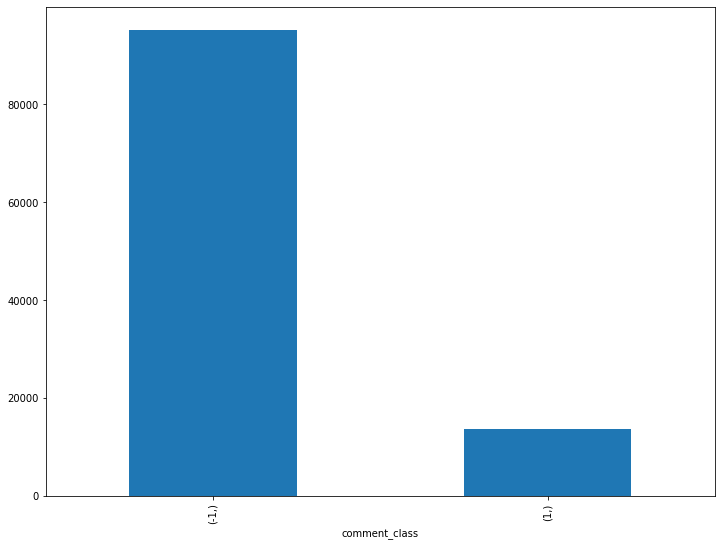

In [11]:
plt.figure(figsize=(12,9))
votes.value_counts().plot.bar()
plt.show()

### Подбор количества кластеров

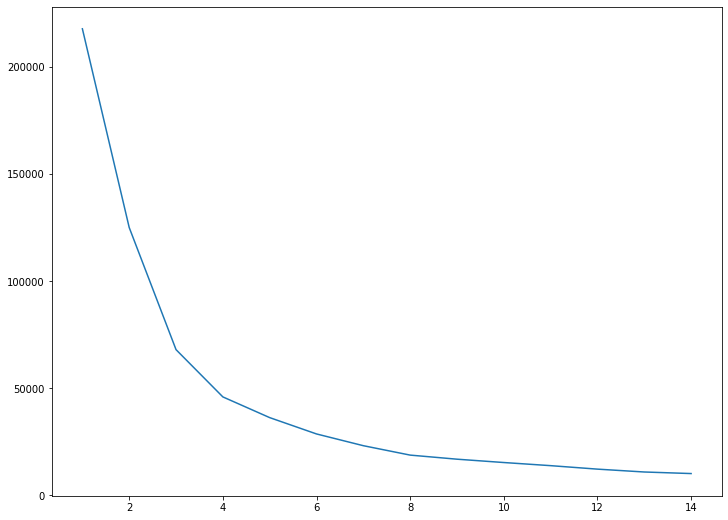

In [12]:
plt.figure(figsize=(12,9))
plt.plot(ks, k_inertia)

In [13]:
diff = np.diff(k_inertia)

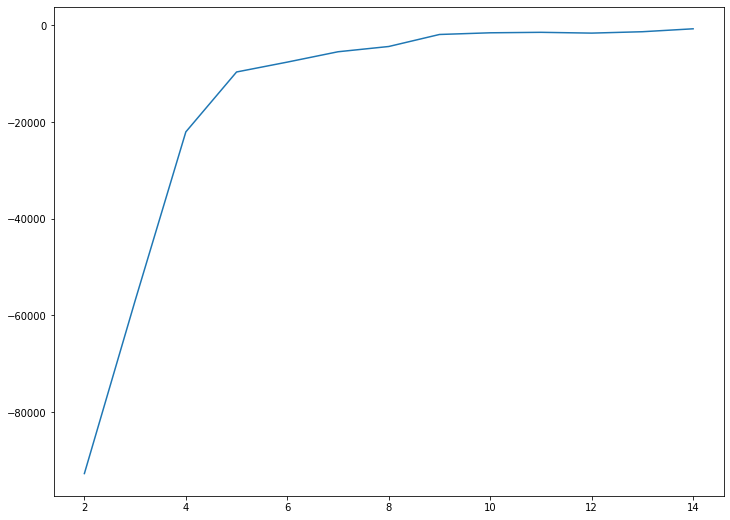

In [14]:
plt.figure(figsize=(12,9))
plt.plot(ks[1:], diff)

In [15]:
diff_r = diff[1:] / diff[:-1]

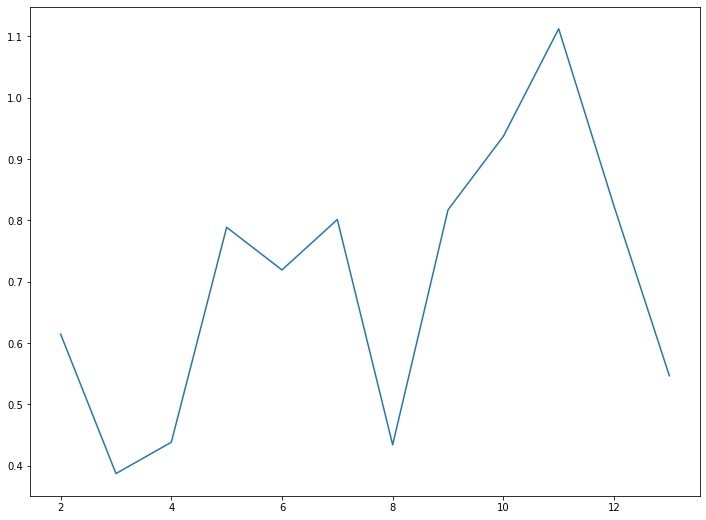

In [16]:
plt.figure(figsize=(12,9))
plt.plot(ks[1:-1], diff_r)

In [17]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

3

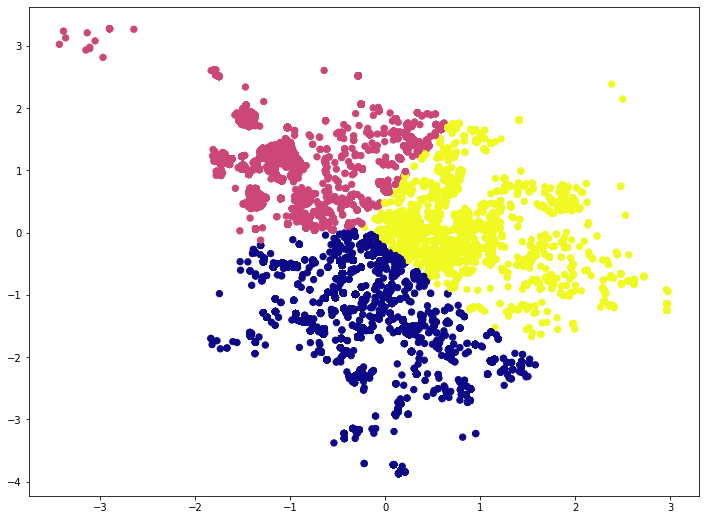

In [18]:
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(12,9))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = clusters, s=40,cmap = 'plasma')

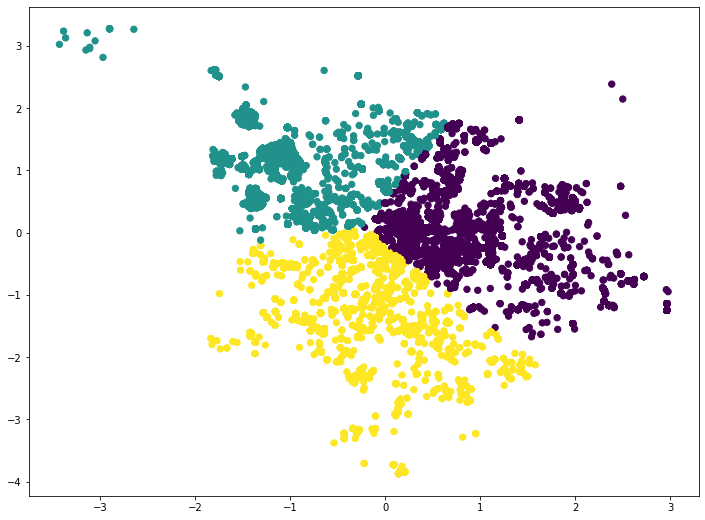

In [19]:
clusters = kmeans.fit_predict(X_scaled)
kmeans = KMeans(n_clusters = 8)

plt.figure(figsize=(12,9))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = clusters, s=40)

### DBSCAN

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
scaler = StandardScaler()
votes_scaled = scaler.fit_transform(votes)

In [ ]:
scan_district = DBSCAN(eps=0.20)

y_district = scan_district.fit_predict(X_scaled)

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c= votes_scaled, cmap = 'rainbow', s =40)
plt.show()